In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pylab as plt
import os, sys
from scipy import interpolate

from astropy.cosmology import FlatLambdaCDM, LambdaCDM,z_at_value, Planck15
import astropy.units as u
cosmo =LambdaCDM(H0=69, Om0=0.286, Ode0=0.7)


In [3]:
#path = "../../../datafiles/sfr_l17_e01.txt"
def give_hist(path):
    bins= hist = np.array([])
    myfile = open(path)
    for l in myfile:
        if l[0]=="#":
            if l[2]=='a':
                try:
                    Z=float(l.split('=')[1].split(',')[0])
                except:
                    Z=np.nan
                
            continue
        row = l.split(", ")
        hist = np.append(hist,float(row[1]))
        bins = np.append(bins,float(row[0]))
    return bins, hist,Z
p1 = "../../../datafiles/sfr_l17_e01.txt"
b1,h1,Z = give_hist(p1)
    

In [4]:
1/0.2

5.0

2.08, 0.84, -0.00, 2.17
0.325, 0.543, 1.000, 0.315


<IPython.core.display.Javascript object>


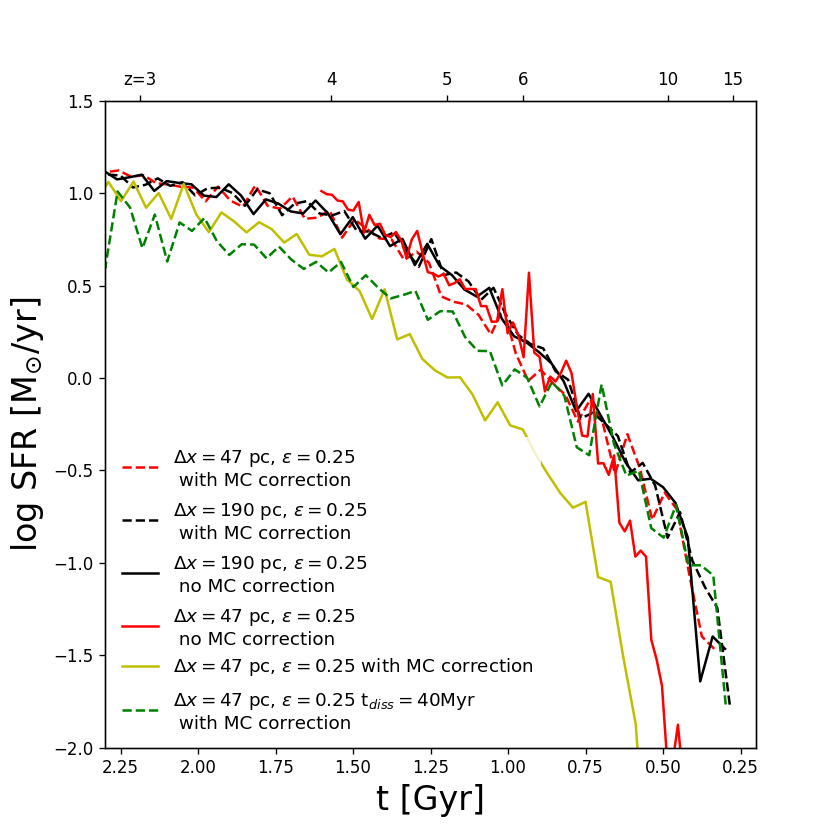

In [5]:
p1 = "../../../datafiles/sfr_l17_e01.txt"
b1,h1,Z1= give_hist(p1)
t1 = cosmo.age(0).value-cosmo.age(Z1).value
p2 = "../../../datafiles/sfr_l19_e025_mc.txt"
b2,h2,Z2= give_hist(p2)
p3 = "../../../datafiles/sfr_l17_e025_mc.txt"
b3,h3,Z3= give_hist(p3)
p4 = "../../../datafiles/sfr_l18_e01.txt"
b4,h4,Z4= give_hist(p4)
p5 = "../../../datafiles/sfr_l17_e025.txt"
b5,h5,Z5= give_hist(p5)
p6 = "../../../datafiles/sfr_l19_e025_Z5.txt"
b6,h6,Z6= give_hist(p6)
p7 = "../../../datafiles/sfr_l19_e025_mcZ5.txt"
b7,h7,Z7= give_hist(p7)
p8 = "../../../datafiles/sfr_l19_e025_mc_tdiss20.txt"
b8,h8,Z8= give_hist(p8)
t2 = cosmo.age(0).value-cosmo.age(Z2).value
print "{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}".format(Z1,Z2,Z3, Z4)
print "{0:.3f}, {1:.3f}, {2:.3f}, {3:.3f}".format(1./(Z1+1),1./(Z2+1),1./(Z3+1), 1./(Z4+1))
end = cosmo.age(2.9).value
t0=cosmo.age(100).value

q=cosmo.age(15).value/b1.min()

fig, ax = plt.subplots(figsize=[7,7])
ax.set_xlabel("t [Gyr]",fontsize=20)
ax.set_ylabel(r"log SFR [M$_{\odot}$/yr]",fontsize=20)

ax.set_ylim([-2,1.5])
#ax.set_xlim([0.25,2.3])
plt.xlim(2.3,0.2)
a1, a2, a3, a4, a5,a6,a7, a8 = (1./(Z1+1.)), (1./(Z2+1.)), (1./(Z3+1.)), (1./(Z4+1.)),(1./(Z5+1.)),(1./(Z6+1.)),(1./(Z7+1.)),(1./(Z8+1.))

axu = ax.twiny()
axu.set_xlim(0.25,end)
axu.set_xticks([cosmo.age(15).value,cosmo.age(10).value,cosmo.age(6).value,cosmo.age(5).value,cosmo.age(4).value,cosmo.age(3).value])
axu.set_xticklabels(["15","10","6","5","4","z=3"])
ax.axvline(x=cosmo.age(2.64).value)
th1, th2, th3, th8 = (b1[1]-b1[0])/(a1**2),(b2[1]-b2[0])/(a2**2),(b3[1]-b3[0])/(a3**2),(b8[1]-b8[0])/(a8**2)
th4, th5, th6, th7 = (b4[1]-b4[0])/(a4**2),(b5[1]-b5[0])/(a5**2),(b6[1]-b6[0])/(a6**2),(b7[1]-b7[0])/(a7**2)
age = cosmo.age(0).value
#ax.plot(age+(b1+th1/2.)/a1**2, np.log10(h1/1e9/th1),"b-",label=r"$\Delta x = 190$ pc, $\epsilon = 0.1$ no MC correction")
ax.plot(age+(b2+th2/2.)/a2**2, np.log10(h2/1e9/th2),"r--",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$"+"\n with MC correction")
ax.plot(age+(b3+th3/2.)/a3**2, np.log10(h3/1e9/th3),"k--",label=r"$\Delta x = 190$ pc, $\epsilon = 0.25$"+"\n with MC correction")
#ax.plot(age+(b4+th4/2.)/a4**2, np.log10(h4/1e9/th4),"g-",label=r"$\Delta x = 95$ pc, $\epsilon = 0.1$ no MC correction")
ax.plot(age+(b5+th5/2.)/a5**2, np.log10(h5/1e9/th5),"k-",label=r"$\Delta x = 190$ pc, $\epsilon = 0.25$"+"\n no MC correction")
ax.plot(age+(b6+th6/2.)/a6**2, np.log10(h6/1e9/th6),"r-",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$"+"\n no MC correction")
ax.plot(age+(b7+th7/2.)/a7**2, np.log10(h7/1e9/th7),"y-",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ with MC correction")
ax.plot(age+(b8+th8/2.)/a8**2, np.log10(h8/1e9/th8),"g--",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ t$_{diss} = 40$Myr"+"\n with MC correction")


plt.xlim(2.3,0.2)
leg = ax.legend(loc='bottom left', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)

<IPython.core.display.Javascript object>


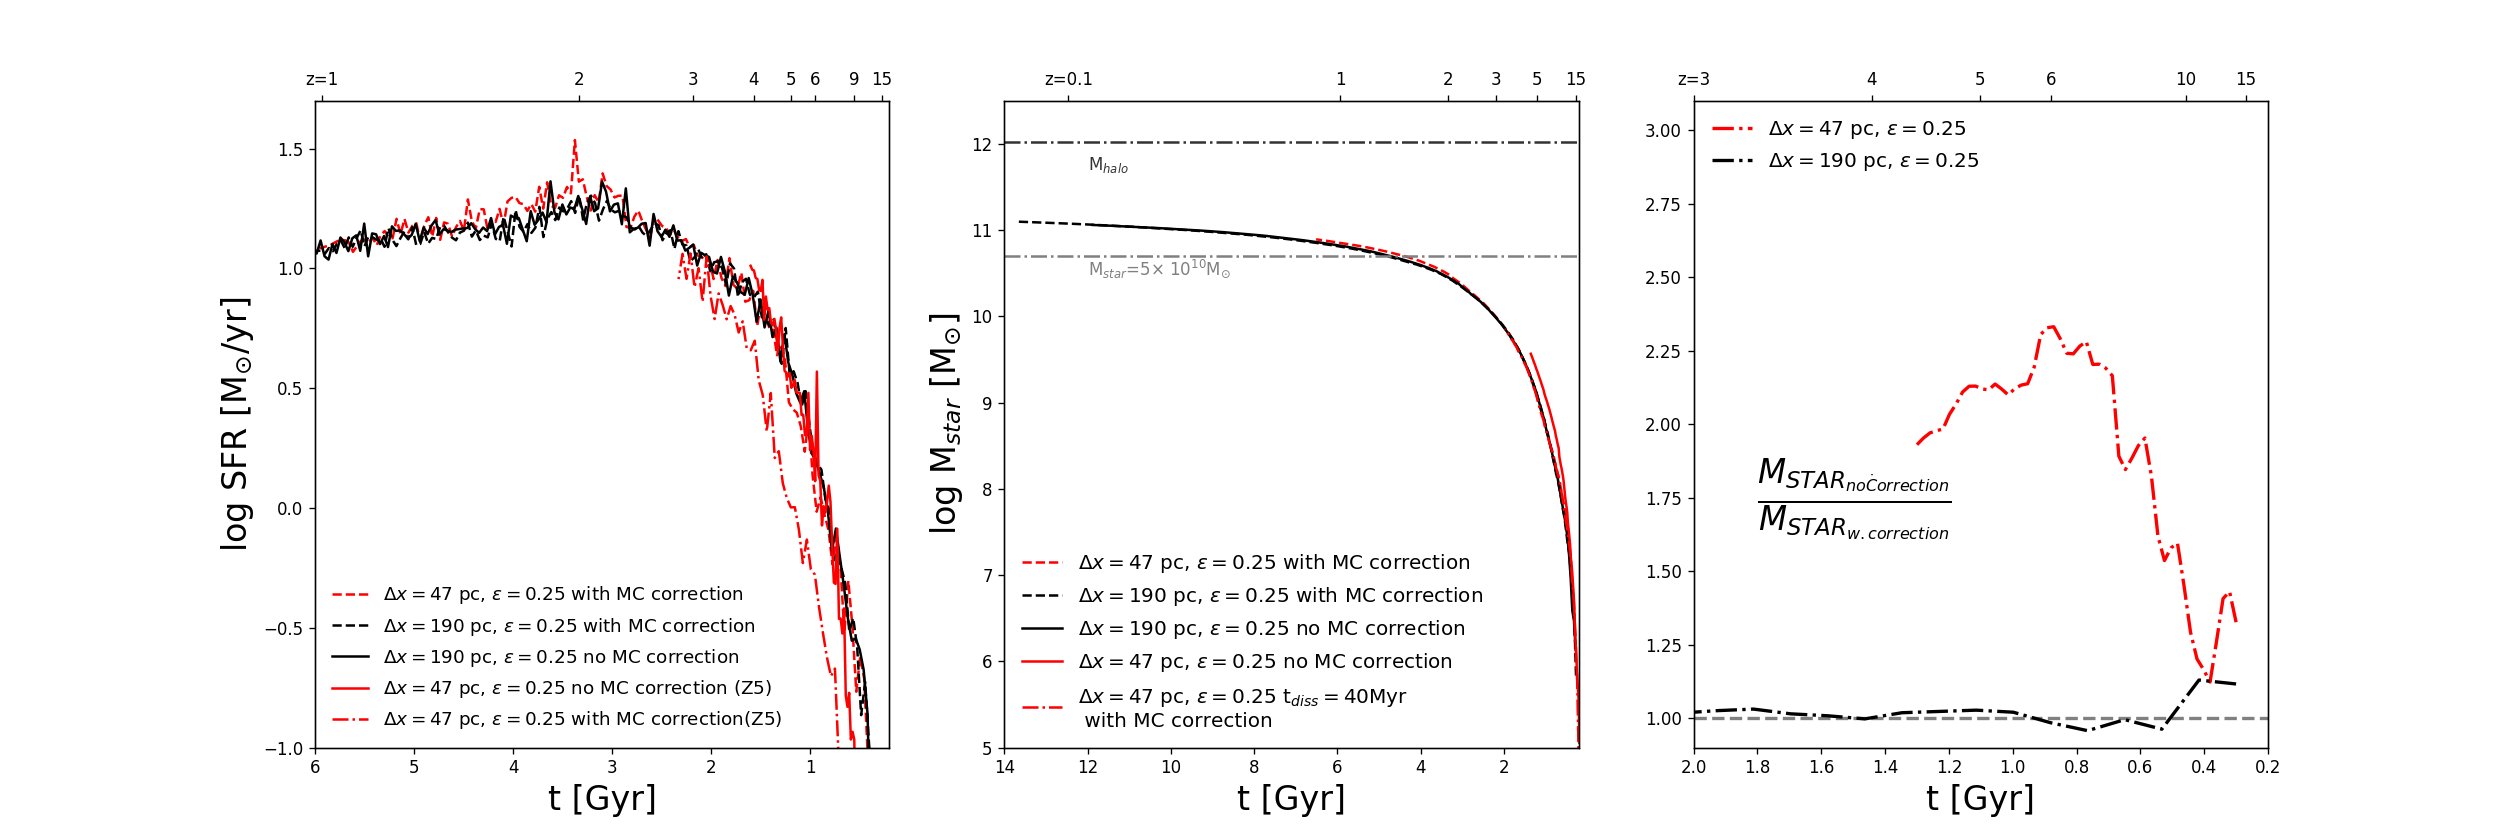

In [6]:
fig, [ax0,ax,ax1] = plt.subplots(1,3,figsize=[21,7])



ax0.set_xlabel("t [Gyr]",fontsize=20)
ax0.set_ylabel(r"log SFR [M$_{\odot}$/yr]",fontsize=20)

ax0.set_ylim([-1,1.7])
#ax.set_xlim([0.25,2.3])

axu0 = ax0.twiny()
axu0.set_xlim(6,0.2)

axu0.set_xticks([cosmo.age(15).value,cosmo.age(9).value,cosmo.age(6).value,cosmo.age(5).value,cosmo.age(4).value,cosmo.age(3).value,cosmo.age(2).value,cosmo.age(1).value])
axu0.set_xticklabels(["15","9","6","5","4","3","2","z=1"])
age = cosmo.age(0).value
#ax.plot(age+(b1+th1/2.)/a1**2, np.log10(h1/1e9/th1),"b-",label=r"$\Delta x = 190$ pc, $\epsilon = 0.1$ no MC correction")
ax0.plot(age+(b2+th2/2.)/a2**2, np.log10(h2/1e9/th2),"r--",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ with MC correction")
ax0.plot(age+(b3+th3/2.)/a3**2, np.log10(h3/1e9/th3),"k--",label=r"$\Delta x = 190$ pc, $\epsilon = 0.25$ with MC correction")
#ax.plot(age+(b4+th4/2.)/a4**2, np.log10(h4/1e9/th4),"g-",label=r"$\Delta x = 95$ pc, $\epsilon = 0.1$ no MC correction")
ax0.plot(age+(b5+th5/2.)/a5**2, np.log10(h5/1e9/th5),"k-",label=r"$\Delta x = 190$ pc, $\epsilon = 0.25$ no MC correction")
ax0.plot(age+(b6+th6/2.)/a6**2, np.log10(h6/1e9/th6),"r-",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ no MC correction (Z5)")
ax0.plot(age+(b7+th7/2.)/a7**2, np.log10(h7/1e9/th7),"r-.",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ with MC correction(Z5)")
#ax0.plot(age+(b8+th8/2.)/a8**2, np.log10(h8/1e9/th8),"g--",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ t$_{diss} = 40$Myr"+"\n with MC correction")


ax0.set_xlim(6,0.2)
leg = ax0.legend(loc='bottom left', ncol=1, shadow=False, fontsize=11)
leg.get_frame().set_linewidth(0.0)






ax.set_ylim([5,12.5])


#ax.set_xlim([0.25,2.3])
ax.set_xlabel("t [Gyr]",fontsize=20)
ax.set_ylabel(r"log M$_{star}$ [M$_{\odot}$]",fontsize=20)

axu = ax.twiny()
axu.set_xlim(14,0.2)
#.xlim(2.3,0.2)

axu.set_xticks([cosmo.age(15).value,cosmo.age(5).value,cosmo.age(3).value,cosmo.age(2).value,cosmo.age(1).value,cosmo.age(0.1).value])
axu.set_xticklabels(["15","5","3","2","1","z=0.1"])
#ax.axvline(x=cosmo.age(2.64).value)
age = cosmo.age(0).value
#ax.plot(age+(b1+th1/2)/a1**2, np.log10(np.cumsum(h1)),"b-",label=r"$\Delta x = 190$ pc, $\epsilon = 0.1$ no MC correction")
ax.plot(age+b2/a2**2, np.log10(np.cumsum(h2)),"r--",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ with MC correction")
ax.plot(age+b3/a3**2, np.log10(np.cumsum(h3)),"k--",label=r"$\Delta x = 190$ pc, $\epsilon = 0.25$ with MC correction")
#ax.plot(age+b4/a4**2, np.log10(np.cumsum(h4)),"g-",label=r"$\Delta x = 95$ pc, $\epsilon = 0.1$ no MC correction")
ax.plot(age+b5/a5**2, np.log10(np.cumsum(h5)),"k-",label=r"$\Delta x = 190$ pc, $\epsilon = 0.25$ no MC correction")
ax.plot(age+b6/a6**2, np.log10(np.cumsum(h6)),"r-",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ no MC correction")
ax.plot(age+b7/a7**2, np.log10(np.cumsum(h7)),"r-.",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ t$_{diss} = 40$Myr"+"\n with MC correction")
#ax.plot(age+b8/a8**2, np.log10(np.cumsum(h8)),"g--",label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ t$_{diss} = 40$Myr"+"\n with MC correction")

ax.axhline(y=np.log10(1.059e12),color="black",alpha=0.8, linestyle='-.')
ax.text(12,np.log10(5e11),r"M$_{halo}$",color='black',alpha=0.8)


ax.axhline(y=np.log10(5e10),color="gray",linestyle='-.')
ax.text(12,np.log10(3e10),r"M$_{star}$=5$\times$ 10$^{10}$M$_{\odot}$",color='gray')
ax.set_xlim(14,0.2)
leg = ax.legend(loc='bottom left', ncol=1, shadow=False, fontsize=12)
leg.get_frame().set_linewidth(0.0)



axu1 = ax1.twiny()
axu1.set_xlim(2,0.2)
#.xlim(2.3,0.2)
f2 = interpolate.interp1d(age+b2/a2**2, np.cumsum(h2))
f3 = interpolate.interp1d(age+b3/a3**2, np.cumsum(h3))
f5 = interpolate.interp1d(age+b5/a5**2, np.cumsum(h5))
f6 = interpolate.interp1d(age+b6/a6**2, np.cumsum(h6))
#f8 = interpolate.interp1d(age+b8/a8**2, np.cumsum(h8))

ax1.set_ylim([0.9,3.1])
time = np.linspace(0.3,1.3,50)
time2 = np.linspace(0.3,6.,50)
ax1.axhline(y=1,linewidth=2,color='gray',linestyle='--' )
ax1.set_xlabel("t [Gyr]",fontsize=20)
axu1.set_xticks([cosmo.age(15).value,cosmo.age(10).value,cosmo.age(6).value,cosmo.age(5).value,cosmo.age(4).value,cosmo.age(3).value])
axu1.set_xticklabels(["15","10","6","5","4","z=3"])
ax1.plot(time,f6(time)/f2(time),'r-.',lw=2,label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$")
ax1.plot(time2,f3(time2)/f5(time2),'k-.',lw=2,label=r"$\Delta x = 190$ pc, $\epsilon = 0.25$")

ax1.text(1.8,1.7,r"$\frac{M_{STAR_{no\.Correction}}}{M_{STAR_{w.correction}}}$",fontsize=28)

ax1.set_xlim(2,0.2)
leg = ax1.legend(loc='upper left', ncol=1, shadow=False, fontsize=12)
leg.get_frame().set_linewidth(0.0)

In [7]:
np.log10(78238334976)


10.893419599468325

In [8]:
print (cosmo.age(0).value - cosmo.age(Z1).value)-b1.min()
print (cosmo.age(0).value - cosmo.age(Z2).value)-b2.min()
print (cosmo.age(0).value - cosmo.age(Z3).value)-b3.min()
print (cosmo.age(0).value - cosmo.age(Z4).value)-b4.min()

11.99430423728834
11.139118382375322
13.517498616286717
12.058690166328597


In [9]:
print (cosmo.age(0).value - cosmo.age(7).value)#-b4.min()

13.0033865993


In [10]:
cosmo.age(15).value

0.27574140085731663

In [9]:
(10**10.35)/(10**10.03)


2.0892961308540405

In [10]:
[cosmo.age(15).value,cosmo.age(10).value,cosmo.age(6).value]


[0.27574140085731663, 0.4834181080517592, 0.9507266055153194]

<IPython.core.display.Javascript object>


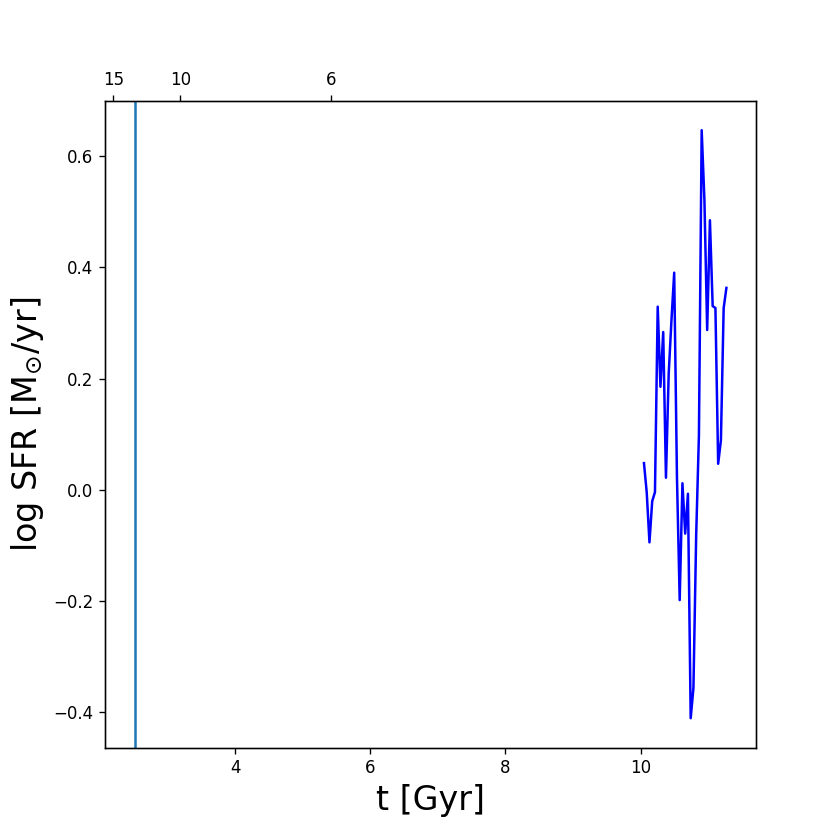

In [11]:
p1 = "../../../datafiles/Na_mc_HR.dat"
b1,h1,Z1= give_hist(p1)
fig, ax = plt.subplots(figsize=[7,7])
ax.set_xlabel("t [Gyr]",fontsize=20)
ax.set_ylabel(r"log SFR [M$_{\odot}$/yr]",fontsize=20)

#ax.set_ylim([-2,1.5])
#ax.set_xlim([0.25,2.3])
#plt.xlim(2.3,0.2)
a1, a2, a3, a4, a5,a6,a7, a8 = (1./(Z1+1.)), (1./(Z2+1.)), (1./(Z3+1.)), (1./(Z4+1.)),(1./(Z5+1.)),(1./(Z6+1.)),(1./(Z7+1.)),(1./(Z8+1.))
axu = ax.twiny()
axu.set_xlim(0.25,end)
axu.set_xticks([cosmo.age(15).value,cosmo.age(10).value,cosmo.age(6).value])#,cosmo.age(5).value,cosmo.age(4).value,cosmo.age(3).value])
axu.set_xticklabels(["15","10","6"])
ax.axvline(x=cosmo.age(2.64).value)
th1, th2, th3, th8 = (b1[1]-b1[0])/(a1**2),(b2[1]-b2[0])/(a2**2),(b3[1]-b3[0])/(a3**2),(b8[1]-b8[0])/(a8**2)
th4, th5, th6, th7 = (b4[1]-b4[0])/(a4**2),(b5[1]-b5[0])/(a5**2),(b6[1]-b6[0])/(a6**2),(b7[1]-b7[0])/(a7**2)
age = cosmo.age(0).value
ax.plot(age+(b1+th1/2.)/a1**2, np.log10(h1/1e9/th1),"b-",label=r"$\Delta x = 190$ pc, $\epsilon = 0.1$ no MC correction")


In [13]:
def z2LB(z):return cosmo.age(0).value - cosmo.age(z).value



Ad_SF1_Mec = np.loadtxt("../../../datafiles/datafilesSFR/Ad_SF1_Mechanical_Iso.dat",delimiter=',')
Ad_SF0_Mec = np.loadtxt("../../../datafiles/datafilesSFR/Ad_SF0_Mechanical_Iso.dat",delimiter=',')
Ad_SF1_Dec = np.loadtxt("../../../datafiles/datafilesSFR/Ad_SF1_Delayed_Iso.dat",delimiter=',')



In [14]:
def z2LB(z):return cosmo.age(0).value - cosmo.age(z).value



Ad_SF1_Mec = np.loadtxt("../../../datafiles/datafilesSFR/Ad_SF1_Mechanical_Iso.dat",delimiter=',')
Ad_SF0_Mec = np.loadtxt("../../../datafiles/datafilesSFR/Ad_SF0_Mechanical_Iso.dat",delimiter=',')
Ad_SF1_Dec = np.loadtxt("../../../datafiles/datafilesSFR/Ad_SF1_Delayed_Iso.dat",delimiter=',')

Mo_SF0_Dec_LR = np.loadtxt("../../../datafiles/datafilesSFR/Mo_hydro_h2_HR_SF0_stable.dat",delimiter=',')
Mo_SF1_Dec_LR = np.loadtxt("../../../datafiles/datafilesSFR/Mo_hydro_h2_HR_SF1_stable.dat",delimiter=',')
Mo_SF0_Dec = np.loadtxt("../../../datafiles/datafilesSFR/Mo_SF0_Delayed_Iso.dat",delimiter=',')
Mo_SF1_Dec = np.loadtxt("../../../datafiles/datafilesSFR/Mo_SF1_Delayed_Iso.dat",delimiter=',')
Mo_SF0_Mec = np.loadtxt("../../../datafiles/datafilesSFR/Mo_SF0_Mechanical_Iso_decay2.dat",delimiter=',')
Mo_SF1_Mec = np.loadtxt("../../../datafiles/datafilesSFR/Mo_SF1_Mechanical_Iso_decay2.dat",delimiter=',')




<IPython.core.display.Javascript object>


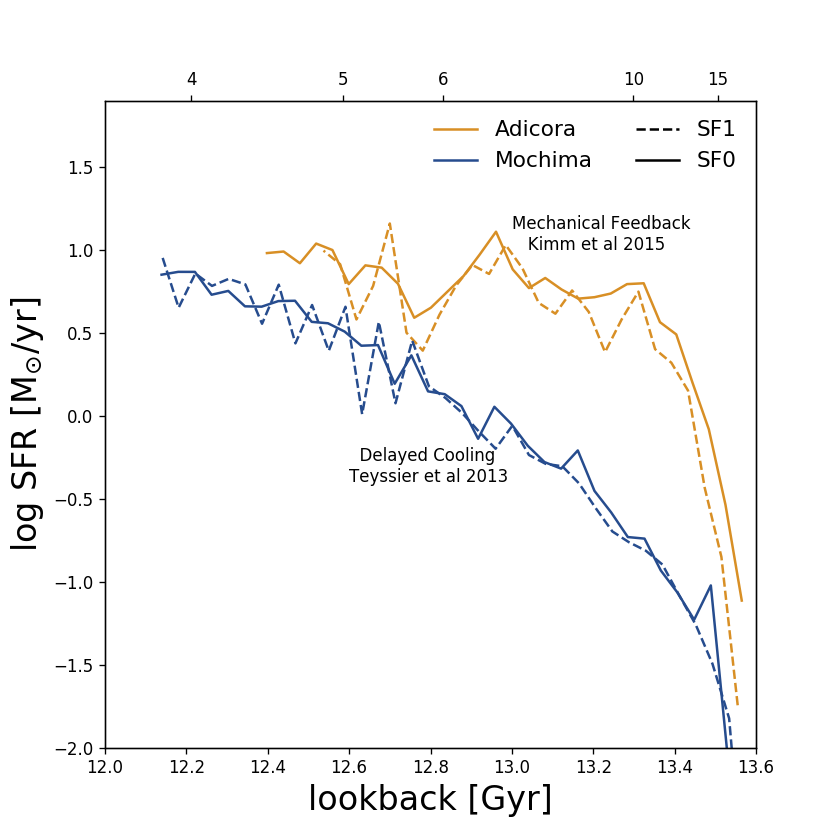

In [17]:
fig, ax = plt.subplots(figsize=[7,7])
ax.set_xlabel("lookback [Gyr]",fontsize=20)
ax.set_ylabel(r"log SFR [M$_{\odot}$/yr]",fontsize=20)

ax.set_ylim([-2.,1.9])
x_min, x_max = 12,13.6
ax.set_xlim([x_min,x_max])
#plt.xlim(2.3,0.2)
z_labels = np.array(["15","10","6","5","4","3"])
times = np.array([z2LB(int(i)) for i in z_labels])

axu = ax.twiny()
axu.set_xlim(12.5,13.8)
axu.set_xticks(times)
axu.set_xticklabels(z_labels)
#ax.axvline(x=cosmo.age(2.64).value)

age = cosmo.age(0).value

ax.plot(10000, 10000,ls='-',ms='4',c="#d88f25",label="Adicora")
ax.plot(10000, 10000,ls='-',ms='4',c="#264c8e",label="Mochima")
ax.plot(10000, 10000,ls='--',ms='4',c='k',label="SF1")
ax.plot(10000, 10000,ls='-',ms='4',c='k',label="SF0")






ax.plot(Ad_SF1_Mec[:,0], np.log10(Ad_SF1_Mec[:,1]),c="#d88f25",ls='--',ms='4',label='')
ax.plot(Ad_SF0_Mec[:,0], np.log10(Ad_SF0_Mec[:,1]),c="#d88f25",ls='-',ms='3')
#ax.plot(Ad_SF1_Dec[:,0], np.log10(Ad_SF1_Dec[:,1]),c="#d88f25",ls='-')

ax.plot(Mo_SF0_Dec_LR[:,0], np.log10(Mo_SF0_Dec_LR[:,1]),c="#264c8e",ls='--')
ax.plot(Mo_SF1_Dec_LR[:,0], np.log10(Mo_SF1_Dec_LR[:,1]),c="#264c8e",ls='-')
#ax.plot(Mo_SF1_Dec[:,0], np.log10(Mo_SF1_Dec[:,1]),c="#264c8e",ls='-')
#ax.plot(Mo_SF0_Dec[:,0], np.log10(Mo_SF0_Dec[:,1]),c="#264c8e",ls='--')
#ax.plot(Mo_SF0_Mec[:,0], np.log10(Mo_SF0_Mec[:,1]),label=r"$\Delta x = 47$ pc, $\epsilon = 0.25$ t$_{diss} = 40$Myr"+"\n with MC correction")
ax.plot(Mo_SF1_Mec[:,0], np.log10(Mo_SF1_Mec[:,1]),ls='-',c="#264c8e")
#ax.plot(Mo_SF1_MecOld[:,0], np.log10(Mo_SF1_MecOld[:,1]),ls='--',c="#264c8e")
#ax.plot(Mo_SF0_MecOld[:,0], np.log10(Mo_SF0_MecOld[:,1]),ls='-',c="#264c8e")
ax.text(13.,1.,"Mechanical Feedback\n   Kimm et al 2015")
ax.text(12.6,-0.4,"  Delayed Cooling\nTeyssier et al 2013")


plt.xlim(x_min,x_max)
leg = ax.legend(loc='bottom left', ncol=2, shadow=False, fontsize=13)
leg.get_frame().set_linewidth(0.0)